<a href="https://colab.research.google.com/github/tanushkapatil/Accenture/blob/main/buzz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Read the CSV files
content_df = pd.read_csv("Content.csv")
reactions_df = pd.read_csv("Reactions.csv")
reaction_types_df = pd.read_csv("ReactionTypes.csv")

# Display the first few rows of each dataframe to understand their structure
content_df.head(), reactions_df.head(), reaction_types_df.head()


(   Unnamed: 0                            Content ID Content Type  \
 0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2        photo   
 1           1  9f737e0a-3cdd-4d29-9d24-753f4e3be810        photo   
 2           2  230c4e4d-70c3-461d-b42c-ec09396efb3f        photo   
 3           3  356fff80-da4d-4785-9f43-bc1261031dc6        photo   
 4           4  01ab84dd-6364-4236-abbb-3f237db77180        video   
 
          Category  
 0        Studying  
 1  healthy eating  
 2  healthy eating  
 3      technology  
 4            food  ,
    Unnamed: 0                            Content ID Reaction Type  \
 0         NaN                                   NaN           NaN   
 1         1.0  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
 2         2.0  97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike   
 3         3.0  97522e57-d9ab-4bd6-97bf-c24d952602d2        scared   
 4         4.0  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
 
            Datetime  
 0          

In [5]:
# Step 1: Clean up unnecessary columns
content_df = content_df.drop(columns=['Unnamed: 0'], errors='ignore')
reactions_df = reactions_df.drop(columns=['Unnamed: 0'], errors='ignore')
reaction_types_df = reaction_types_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Step 2: Merge the Reaction table with the Content table
merged_df = reactions_df.merge(content_df, on='Content ID', how='left')

# Step 3: Merge the result with the Reaction Types table
final_df = merged_df.merge(reaction_types_df, left_on='Reaction Type', right_on='Type', how='left')

# Step 4: Remove unnecessary columns in the final dataset
final_df_cleaned = final_df.drop(columns=['Type'])

# Display the cleaned dataset
final_df_cleaned.head()


,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07-11-2020 09:43,photo,Studying,negative,0.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17-06-2021 12:22,photo,Studying,negative,10.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18-04-2021 05:13,photo,Studying,negative,15.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06-01-2021 19:13,photo,Studying,negative,0.0


In [6]:
# Remove rows with NaN values to clean the dataset
final_df_cleaned = final_df_cleaned.dropna()

# Step 5: Aggregate scores by category
category_scores = final_df_cleaned.groupby('Category')['Score'].sum().reset_index()

# Sort categories by total score in descending order
top_categories = category_scores.sort_values(by='Score', ascending=False).head(5)

# Display the top 5 categories
top_categories


,Category,Score
13,animals,71242.0
20,healthy eating,69067.0
25,technology,68521.0
22,science,66549.0
15,culture,64952.0


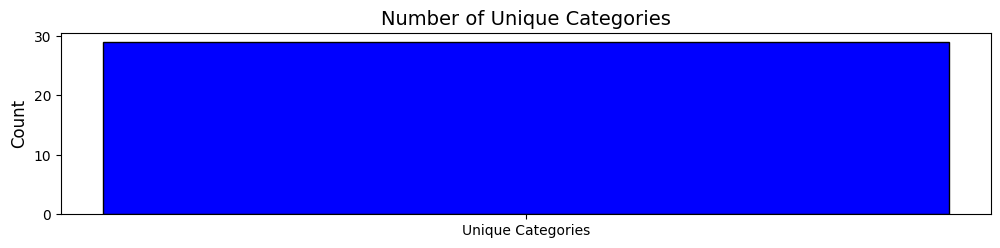

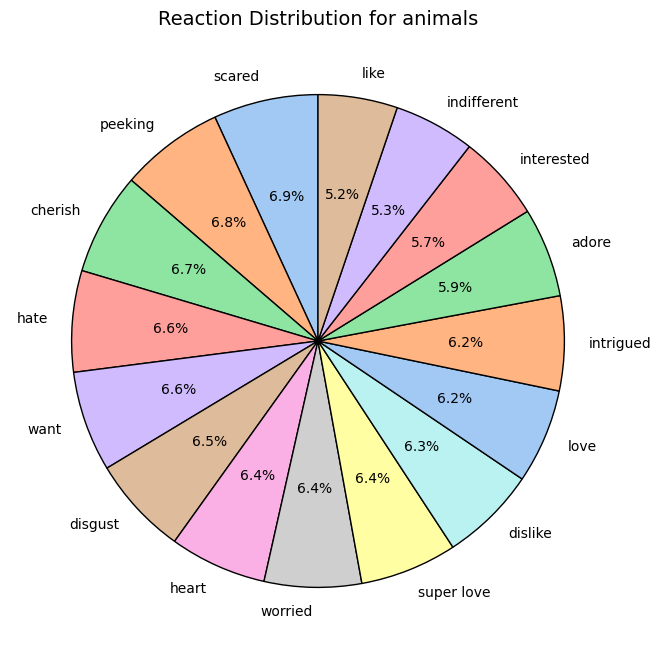

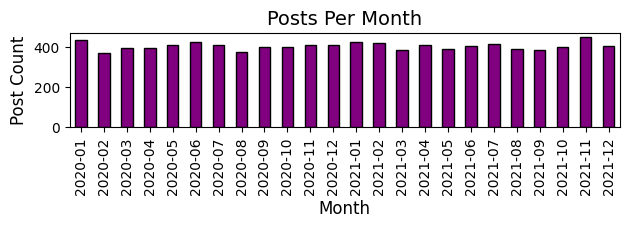

In [13]:
import matplotlib.pyplot as plt

# 1. Number of Unique Categories
unique_categories = final_df_cleaned['Category'].nunique()

plt.figure(figsize=(12, 8))

# 1. Bar chart for unique categories
plt.subplot(3, 1, 1)
plt.bar(['Unique Categories'], [unique_categories], color='blue', edgecolor='black')
plt.title('Number of Unique Categories', fontsize=14)
plt.ylabel('Count', fontsize=12)

# 2. Reactions in the Most Popular Category
# Identify the most popular category
most_popular_category = top_categories.iloc[0]['Category']

# Filter data for the most popular category
popular_category_data = final_df_cleaned[final_df_cleaned['Category'] == most_popular_category]

# Group by Reaction Type and count reactions
reaction_counts = popular_category_data['Reaction Type'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
reaction_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)
plt.title(f'Reaction Distribution for {most_popular_category}', fontsize=14)
plt.ylabel('')  # Remove y-axis label
plt.show()


# 3. Month with the Most Posts
final_df_cleaned['Month'] = final_df_cleaned['Datetime'].dt.to_period('M')
month_counts = final_df_cleaned['Month'].value_counts().sort_index()

plt.subplot(3, 1, 3)
month_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Posts Per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Post Count', fontsize=12)

plt.tight_layout()
plt.show()


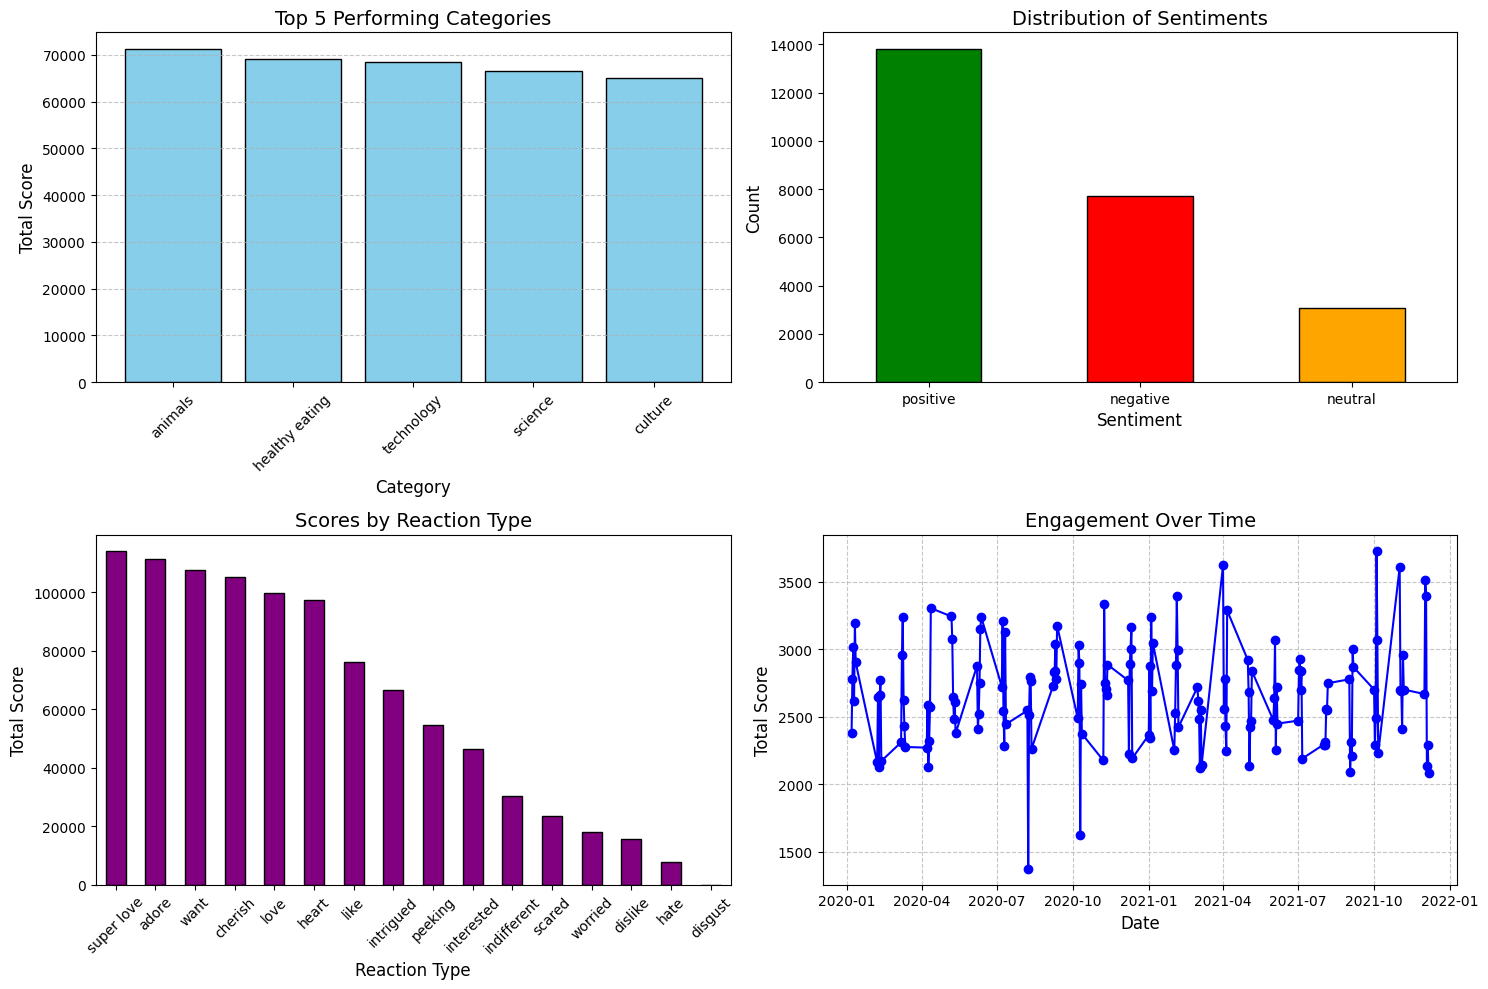

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_df_cleaned is the merged and cleaned dataset
# Data Preparation
final_df_cleaned['Score'] = final_df_cleaned['Score'].fillna(0)  # Ensure no NaN scores
top_categories = final_df_cleaned.groupby('Category')['Score'].sum().reset_index()
top_categories = top_categories.sort_values(by='Score', ascending=False).head(5)

# Insights Visualization
plt.figure(figsize=(15, 10))

# 1. Top Performing Categories
plt.subplot(2, 2, 1)
plt.bar(top_categories['Category'], top_categories['Score'], color='skyblue', edgecolor='black')
plt.title('Top 5 Performing Categories', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2. Sentiment Distribution
sentiment_counts = final_df_cleaned['Sentiment'].value_counts()
plt.subplot(2, 2, 2)
sentiment_counts.plot(kind='bar', color=['green', 'red', 'orange'], edgecolor='black')
plt.title('Distribution of Sentiments', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10)

# 3. Reaction Type Scores
reaction_scores = final_df_cleaned.groupby('Reaction Type')['Score'].sum().sort_values(ascending=False)
plt.subplot(2, 2, 3)
reaction_scores.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Scores by Reaction Type', fontsize=14)
plt.xlabel('Reaction Type', fontsize=12)
plt.ylabel('Total Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# 4. Time-Based Trends (if Datetime exists in data)
final_df_cleaned['Datetime'] = pd.to_datetime(final_df_cleaned['Datetime'], errors='coerce')
time_scores = final_df_cleaned.groupby(final_df_cleaned['Datetime'].dt.date)['Score'].sum()
plt.subplot(2, 2, 4)
time_scores.plot(color='blue', marker='o')
plt.title('Engagement Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Score', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
